# Intro

Le dataset sur lequel j'ai travaillé provient du UCI Machine Learning Repository.<br/> 
<b>Source :</b> <a>https://archive.ics.uci.edu/ml/datasets/census+income</a>.<br/>
Les données du set proviennent du recensement de 1994 aux Etats-unis. L’objectif sera ici de prédire si le revenu d’un individu est de plus 50K$ ou pas (grâce à la variable « Income »). <br/> 
Comme il n'y a que 2 résultats possible, la méthode de ML sera celle de classification : régression logistic, SVM, forest tree etc…<br/> 
On pourra tester plusieurs de ces modèles pour déterminer le plus efficace.

In [1]:
# Importation des librairies:

import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse et nettoyage du dataset
La première étape est d’analyser les données et de les nettoyer <br/>

In [2]:
adult_data = pd.DataFrame(pd.read_csv('dataset/adult.data', header=None))
adult_data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [3]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_data.shape

(32561, 15)

In [5]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#select les ligne <50k puis occupation avec unique idem >50k puis 
    #adult_data[adult_data['income']==' <=50K'].occupation.unique()
    #adult_data[adult_data['income']==' >50K'].occupation.unique()

La dataset contient  32561 lignes et 15 colonnes qui pour la suite pourraient se diviser ainsi : 
   - 6 variables sont numériques, les 9 autres sont catégorielles.
   - 14 sont les features 
   - 1 la target. 

#### FEATURES
- 'age',
- 'workclass': Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- 'fnlwgt': continuous.
- 'education': Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- 'education-num': continuous.
- 'marital-status': Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- 'occupation': Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- 'relationship': Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- 'race': White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- 'sex': Female, Male.
- 'capital-gain': continuous.
- 'capital-loss': continuous.
- 'hours-per-week': continuous.
- 'native-country': United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### TARGET
- 'income' : >50K, <=50K

Après recherche, la variable "fnlwgt" représente le poids final, qui correspond au « nombre d'unités de la population cible représentées par l'unité répondante ». </br>

La variable "education_num" correspond au nombre total d'années d'études, elle est la représentation numérique de la variable éducation. Je peux tout de même faire un table de corrélation pour confirmer cette info.</br>

La variable "relationship" représente de la personne interrogée au sein de la famille. </br>
"capital_gain" et "capital_loss" sont des revenus autres que le salaire.</br>

Pour la suite du travail, on pourra supprimer la variable « education » puisque nous avons sa représentation numérique. Ce qui nous évitera pour cette variable de passer par l’étape get_dummies.

### Correlation des valeurs numériques 
Pour supprimer d'éventuelles colonnes qui auraient un effet sur le modèle.

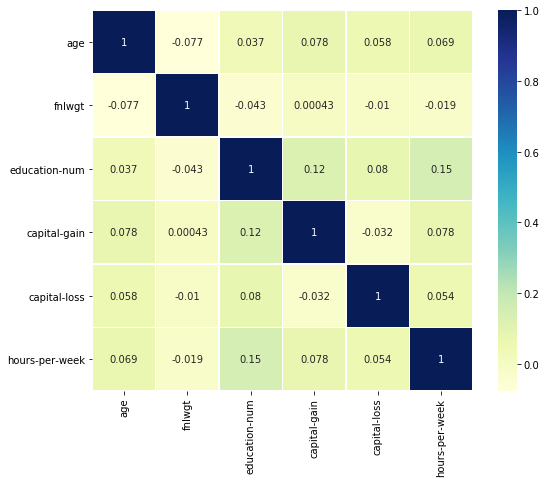

In [7]:
adult_data_num = adult_data.select_dtypes(include=['int64'])
adult_data_num_corr = adult_data_num.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap #
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio (mask=mask)
ax = sns.heatmap(adult_data_num_corr, cmap=cmap, annot=True, annot_kws={"size": 10},square=True, linewidths=.5)

Les variables les plus corrélées sont celles qui dans le graph ont un grand nombre de cases à la couleur très sombre. Ici, les variables numériques ne sont pas corrélées entre elles.

### La variable "native-country"

In [8]:
print('Nb de pays:',adult_data['native-country'].value_counts().count()) ,adult_data['native-country'].value_counts()

Nb de pays: 42


(None,  United-States                 29170
  Mexico                          643
  ?                               583
  Philippines                     198
  Germany                         137
  Canada                          121
  Puerto-Rico                     114
  El-Salvador                     106
  India                           100
  Cuba                             95
  England                          90
  Jamaica                          81
  South                            80
  China                            75
  Italy                            73
  Dominican-Republic               70
  Vietnam                          67
  Guatemala                        64
  Japan                            62
  Poland                           60
  Columbia                         59
  Taiwan                           51
  Haiti                            44
  Iran                             43
  Portugal                         37
  Nicaragua                        34
  Peru

In [9]:
adult_data['native-country'].value_counts()/len(adult_data)*100

 United-States                 89.585701
 Mexico                         1.974755
 ?                              1.790486
 Philippines                    0.608089
 Germany                        0.420749
 Canada                         0.371610
 Puerto-Rico                    0.350112
 El-Salvador                    0.325543
 India                          0.307116
 Cuba                           0.291760
 England                        0.276404
 Jamaica                        0.248764
 South                          0.245693
 China                          0.230337
 Italy                          0.224195
 Dominican-Republic             0.214981
 Vietnam                        0.205768
 Guatemala                      0.196554
 Japan                          0.190412
 Poland                         0.184270
 Columbia                       0.181198
 Taiwan                         0.156629
 Haiti                          0.135131
 Iran                           0.132060
 Portugal       

Pour ce qui est de la variable « Country », on compte 42 entrées : 40 pays,  1 'South'et 1 de type NC (« ? »).<br/>
On peut pour cette colonne par exemple créer une nouvelle variable qui regrouperait les pays par continent dès lors que ce n’est pas les USA qui représentent 89,5% des répondants. <br/>Pour les lignes NC, je vais les supprimer. Ca fera 583 lignes en moins sur 32561. On travaillera donc avec 31898 lignes.

In [10]:
adult_data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [11]:
America=[' Cuba', ' Jamaica', ' Mexico',' Puerto-Rico', ' Honduras',' Canada',' Columbia',' Ecuador',' Haiti', ' Dominican-Republic',' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Trinadad&Tobago', ' Nicaragua',' El-Salvador']
Asia = [' India',' Iran', ' Philippines',' Cambodia', ' Thailand',' Laos',' Taiwan', ' China', ' Japan',' Vietnam', ' Hong']
Europe =[' England', ' Germany',' Italy', ' Poland',' Portugal',' France', ' Yugoslavia',' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands']
adult_data = adult_data.assign(group_country=adult_data['native-country'].map(lambda x: 'America' if x in America else ('Asia' if x in Asia else ('Europe' if x in Europe else x))))
adult_data['group_country'].value_counts()

 United-States    29170
America            1536
Asia                671
 ?                  583
Europe              521
 South               80
Name: group_country, dtype: int64

Je vais peux ensuite supprimer la colonne 'native-country' et les lignes contenant "?" et "South" dont on ne sait pas à quoi cela se réfère.

In [12]:
adult_data.drop(adult_data[adult_data['group_country'] ==' ?'].index, inplace = True )
adult_data.drop(adult_data[adult_data['group_country'] ==' South'].index, inplace = True )


In [13]:
adult_data['group_country'].value_counts()

 United-States    29170
America            1536
Asia                671
Europe              521
Name: group_country, dtype: int64

In [14]:
adult_data.drop(columns = 'native-country',inplace = True)

In [15]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,group_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,America


In [16]:
### La variable 'fnlwgt'

In [17]:
#adult_data['fnlwgt'].value_counts()

In [18]:
#Pour la variable "fnlwgt", il y a 21648 valeurs différentes. Difficile d'y voir une utilité. Je vais donc supprimer cette colonne.


In [19]:
#adult_data=adult_data.drop(columns = 'fnlwgt')

In [20]:
#adult_data.head()

In [21]:
adult_data.shape

(31898, 15)

### La variable : Income
Je regarde la distribution de la Target.

In [22]:
print(adult_data.groupby('income').size())

income
 <=50K    24219
 >50K      7679
dtype: int64


Je passe cette colonne en ordinal pour plus faciliter les calculs.

In [23]:
adult_data['income_ordinal'] = adult_data['income'].map(lambda x: 1 if x==' >50K' else 0)
adult_data['income_ordinal'].value_counts()

0    24219
1     7679
Name: income_ordinal, dtype: int64

In [24]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,group_country,income_ordinal
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,America,0


### Les valeurs manquantes

Pour les autres variables, je n'ai rien vu de particulier. Mis à part qu'il faudra vérifier s'il n'y a pas de valeurs manquantes.


In [25]:
adult_data.isna().sum().sum()

0

Il n'y a pas de valeurs manquantes. Je peux passer à la partie ML

## ML 

Je sépare les variables en Features et Target

In [26]:
# y pour la Target
y= adult_data["income_ordinal"]

# X pour les Features
X=adult_data.drop(columns=['income_ordinal','income'])

Je peux maintenant créer des variables ordinales depuis les variables catégorielles pour les Features.

In [27]:
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,group_country_ United-States,group_country_America,group_country_Asia,group_country_Europe
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


### 1. Split des données en training (80%) et testing (20%) .
Je réalise un split classique de type 80% pour le training et 20% pour le test.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,train_size=0.80, test_size=0.20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25518, 70), (6380, 70), (25518,), (6380,))

## 2. Sélection du modèle via la Cross-Validation

Je décide de passer par la méthode de cross-validation pour choisir mon modèle de prédiction. <br/>

La validation croisée en français est une méthode qui permet d'estimer les performances de généralisation de plusieurs modèles à partir de l’ensemble d’apprentissage. Cette estimation pourra être comparée à l’estimation obtenue sur l’ensemble de test mis de côté au départ. <br/>

La cross validation consiste à recommencer sur plusieurs découpages train/test différents du jeu de données initial de manière à s’assurer que la prédiction est stable et éviter d'overfitting.

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

print('Liste des scores existants dans le module sklearn:\n\n',metrics.SCORERS.keys())

Liste des scores existants dans le module sklearn:

 dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


Le score de comparaison que je choisis est l'`Accuracy` : nb de bonnes predictions (TP) sur l'ensemble des prédictions.<br/>
Je vais tester les modèles suivant :`LogisticRegression`, `DecisionTreeClassifier`, `KNeighborsClassifier` et `RandomForestClassifier`. <br/>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

print("Rf:")
accuracy = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0), X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Random Forest is: " , accuracy.mean()*100)

print("\n\nLog:")
#print(cross_val_score(log_class, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(LogisticRegression(solver='liblinear'), X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of LogisticRegression is: " , accuracy.mean()*100)

print("\n\nK Neighbors:")
#print(cross_val_score(knn_class, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of K Neighbors is: " , accuracy.mean()*100)
 
print("\n\nDecision Tree:")
#print(cross_val_score(dtc_class, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(DecisionTreeClassifier(),X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Decision Tree is: " , accuracy.mean()*100)
 


Rf:
[0.77164121 0.77359969 0.77272727 0.76880878 0.77351097 0.76959248
 0.76793414 0.77263818 0.77342219 0.77067817]
Accuracy of Random Forest is:  77.14553068881001


Log:
[0.79749315 0.79905993 0.80407524 0.79231975 0.80054859 0.7934953
 0.79067033 0.79615837 0.80399843 0.7996864 ]
Accuracy of LogisticRegression is:  79.77505470395492


K Neighbors:
[0.76380729 0.76302389 0.76332288 0.75117555 0.75431034 0.76253918
 0.75735006 0.74323795 0.76127009 0.75421403]
Accuracy of K Neighbors is:  75.74251269964566


Decision Tree:
[0.81433608 0.82060321 0.82719436 0.81152038 0.82445141 0.82131661
 0.80556644 0.81066249 0.81615053 0.81654253]
Accuracy of Decision Tree is:  81.6834403710982


Au regard des scores le modèle le plus probant est celui du `Decision Tree`.

## 3. Travail avec le modèle de `Decision Tree`

<b>Note</b> : En tenant compte du nombre de lignes.
faire un value counts sur le données originel pour voir la répartition des classes (positve:négatif)
cela permet de déduire la paramètre de CV pour bien faire apprendre le modele

In [31]:
dtc_class = DecisionTreeClassifier()

# fitting the model
dtc_class.fit(X_train, y_train)

# predict the response
y_test_predict_dtc = dtc_class.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

# Confusion_matrix
confusion_matrix_dtc = confusion_matrix(y_test, y_test_predict_dtc)
print('\nconfusion_matrix:\n', confusion_matrix_dtc)


confusion_matrix:
 [[4207  636]
 [ 587  950]]


In [33]:
print('\nFeature_importances:\n', dict(zip(adult_data.columns,dtc_class.fit(X_train, y_train).feature_importances_)))


Feature_importances:
 {'age': 0.11220979897713868, 'workclass': 0.17903860226482057, 'fnlwgt': 0.11406561456867174, 'education': 0.10631748963447182, 'education-num': 0.039309592462369834, 'marital-status': 0.06420184420131038, 'occupation': 0.001435141008433315, 'relationship': 0.005195666738678248, 'race': 0.006209998566176983, 'sex': 0.0, 'capital-gain': 0.008576952048373351, 'capital-loss': 0.005488144450857864, 'hours-per-week': 0.010828393298411097, 'income': 0.005178818777720528, 'group_country': 0.0, 'income_ordinal': 0.0004154278746982207}


In [34]:
"""# Load libraries
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.tree import export_graphviz

#Visualize Decision Tree

# Create DOT data
dot_data = tree.export_graphviz(dtc_class, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["<50k",">50k"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PDF
    #graph.write_pdf("iris.pdf")

# Create PNG
    #graph.write_png("iris.png")

True
"""

'# Load libraries\nfrom IPython.display import Image  \nfrom sklearn import tree\nimport pydotplus\nfrom sklearn.tree import export_graphviz\n\n#Visualize Decision Tree\n\n# Create DOT data\ndot_data = tree.export_graphviz(dtc_class, out_file=None, \n                                feature_names=X.columns,  \n                                class_names=["<50k",">50k"])\n\n# Draw graph\ngraph = pydotplus.graph_from_dot_data(dot_data)  \n\n# Show graph\nImage(graph.create_png())\n\n# Create PDF\n    #graph.write_pdf("iris.pdf")\n\n# Create PNG\n    #graph.write_png("iris.png")\n\nTrue\n'

In [35]:
#from sklearn import tree

#tree.plot_tree(dtc_class, feature_names=X_train.columns, class_names=["<50k",">50k"] ) 

#plt.show()

## A faire en comparaison au train set
#### Evaluation de la performance

<b>Note : </b>Analyse d'erreur ce qui a tété fait et pourquoi, dessiner l'arbre de décision le feature importance, PCA et colorier ce qui a été prédit et la réalité. 

In [36]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_test_predict_dtc)*100,2))
print("Balanced Accuracy:",round(metrics.balanced_accuracy_score(y_test, y_test_predict_dtc)*100,2))
print("Precision:",round(metrics.precision_score(y_test, y_test_predict_dtc)*100,2))
print("Recall:",round(metrics.recall_score(y_test, y_test_predict_dtc)*100,2))
print("F1 score:",round(metrics.f1_score(y_test, y_test_predict_dtc)*100,2))

Accuracy: 80.83
Balanced Accuracy: 74.34
Precision: 59.9
Recall: 61.81
F1 score: 60.84


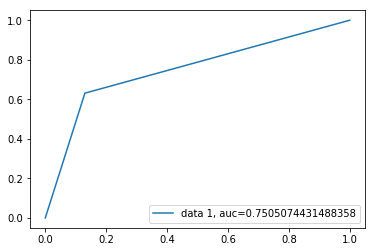

In [37]:
y_pred_proba = dtc_class.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## grid search
    1) established the parameters to gris-search. it is important  to note that these parameters change depending on what type of model we are building. Be sure to look up the model specific documentation for parameter explanation. 
    2) Running the grid search. this step may take a long time to run depending on the data and number of parameters.
    3) Setting up the grid-serach. note how the parameter are wrapped within a dictionary
    4) fitting the grid to the data
    5) Depending on the designed parameter for measuring the model, will print the best score throughout the Grid Search
    6) Print the best parameters used for the highest score of the model
    
    <a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV</a>
    
    <a>https://medium.com/@elutins/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596</a>

In [38]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

criterion=['gini','entropy']
max_depth=[1,3,5,None]
splitter=['best','random']

grid = GridSearchCV(estimator=model, cv=5, param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

criterion : string, optional (default=”gini”)

    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
splitter : string, optional (default=”best”)

    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
max_depth : int or None, optional (default=None)

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                      

In [40]:
print(grid.best_score_)
print(grid.best_params_)

0.8504976879065758
{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


## Je travaille avec le modèle retenu par la cross validation : Decision tree en intégrant les paramètres retenus par la méthode du Grid-search.

#### faire la comparaison des metrics avec le predict hors super paramètres



confusion_matrix:
 [[4628  215]
 [ 740  797]]

Feature_importances:
 {'age': 0.010643453676851673, 'workclass': 0.0, 'fnlwgt': 0.23032603840537838, 'education': 0.2185609967311207, 'education-num': 0.04910074629739871, 'marital-status': 0.0205516065066746, 'occupation': 0.0, 'relationship': 0.0, 'race': 0.0, 'sex': 0.0, 'capital-gain': 0.0, 'capital-loss': 0.0, 'hours-per-week': 0.0003752586280258727, 'income': 0.0, 'group_country': 0.0, 'income_ordinal': 0.0}

Accuracy: 85.03

Balanced Accuracy: 73.71

Precision: 78.75

Recall: 51.85

F1 score: 62.53


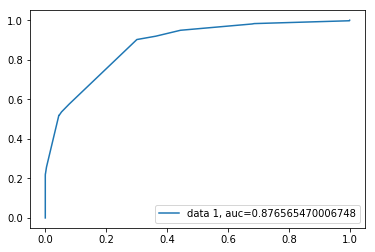

In [41]:
dtc_class_hyper = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best')

# fitting the model
dtc_class_hyper.fit(X_train, y_train)

# predict the response
y_test_predict_dtc_hyper = dtc_class_hyper.predict(X_test)

# Confusion_matrix
confusion_matrix_dtc_hyper = confusion_matrix(y_test, y_test_predict_dtc_hyper)
print('\nconfusion_matrix:\n', confusion_matrix_dtc_hyper)

print('\nFeature_importances:\n', dict(zip(adult_data.columns,dtc_class_hyper.fit(X_train, y_train).feature_importances_)))

print("\nAccuracy:",round(metrics.accuracy_score(y_test, y_test_predict_dtc_hyper)*100,2))
print("\nBalanced Accuracy:",round(metrics.balanced_accuracy_score(y_test, y_test_predict_dtc_hyper)*100,2))
print("\nPrecision:",round(metrics.precision_score(y_test, y_test_predict_dtc_hyper)*100,2))
print("\nRecall:",round(metrics.recall_score(y_test, y_test_predict_dtc_hyper)*100,2))
print("\nF1 score:",round(metrics.f1_score(y_test, y_test_predict_dtc_hyper)*100,2))

y_pred_proba_hyper = dtc_class_hyper.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_hyper)
auc = metrics.roc_auc_score(y_test, y_pred_proba_hyper)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [42]:
"""feature_importances_df = pd.DataFrame.from_dict(dict(zip(adult_data.columns,dtc_class_hyper.fit(X_train, y_train).feature_importances_)), orient='index', dtype=None, columns=None)

feature_importances_df

pd.DataFrame.sort(feature_importances_df[0], axis=0, ascending=False, inplace=False)"""

"feature_importances_df = pd.DataFrame.from_dict(dict(zip(adult_data.columns,dtc_class_hyper.fit(X_train, y_train).feature_importances_)), orient='index', dtype=None, columns=None)\n\nfeature_importances_df\n\npd.DataFrame.sort(feature_importances_df[0], axis=0, ascending=False, inplace=False)"

## Comparaison résultats Train vs Test


confusion_matrix:
 [[4207  636]
 [ 587  950]]

confusion_matrix_hyper:
 [[4628  215]
 [ 740  797]]

accuracy_score_train: 85.32 
accuracy_score_test: 80.83 
accuracy_score_test_hyper: 85.03

balanced_accuracy_score_train 74.53 
balanced_accuracy_score_test 74.34 
balanced_accuracy_score_test_hyper 73.71

precision_score_train 78.5 
precision_score_test 59.9 
precision_score_test_hyper 78.75

recall_score_train 53.73 
recall_score_test 61.81 
recall_score_test_hyper 51.85

F1_score_train 63.79 
F1_score_test 60.84 
F1_score_test_hyper 62.53


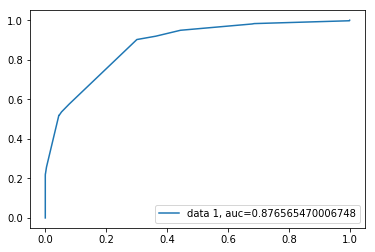

In [43]:
# Confusion_matrix
confusion_matrix_dtc_hyper = confusion_matrix(y_test, y_test_predict_dtc_hyper)
print('\nconfusion_matrix:\n', confusion_matrix_dtc)
print('\nconfusion_matrix_hyper:\n', confusion_matrix_dtc_hyper)

# Accuracy
AC_train = round(metrics.accuracy_score(y_train, dtc_class_hyper.predict(X_train))*100,2)
AC_test = round(metrics.accuracy_score(y_test, y_test_predict_dtc)*100,2)
AC_test_hyper = round(metrics.accuracy_score(y_test, y_test_predict_dtc_hyper)*100,2)
print('\naccuracy_score_train:', AC_train,'\naccuracy_score_test:', AC_test, '\naccuracy_score_test_hyper:', AC_test_hyper)

# Balanced Accuracy
BAC_train = round(metrics.balanced_accuracy_score(y_train, dtc_class_hyper.predict(X_train))*100,2)
BAC_test  = round(metrics.balanced_accuracy_score(y_test, y_test_predict_dtc)*100,2)
BAC_test_hyper = round(metrics.balanced_accuracy_score(y_test, y_test_predict_dtc_hyper)*100,2)

print('\nbalanced_accuracy_score_train', BAC_train, '\nbalanced_accuracy_score_test',BAC_test, '\nbalanced_accuracy_score_test_hyper', BAC_test_hyper)

# Precision score
PS_train = round(metrics.precision_score(y_train, dtc_class_hyper.predict(X_train))*100,2)
PS_test = round(metrics.precision_score(y_test, y_test_predict_dtc)*100,2)
PS_test_hyper = round(metrics.precision_score(y_test, y_test_predict_dtc_hyper)*100,2)


print('\nprecision_score_train', PS_train, '\nprecision_score_test', PS_test, '\nprecision_score_test_hyper', PS_test_hyper)

# Recall score
RS_train = round(metrics.recall_score(y_train, dtc_class_hyper.predict(X_train))*100,2)
RS_test = round(metrics.recall_score(y_test, y_test_predict_dtc)*100,2) 
RS_test_hyper = round(metrics.recall_score(y_test, y_test_predict_dtc_hyper)*100,2) 

print('\nrecall_score_train', RS_train, '\nrecall_score_test', RS_test, '\nrecall_score_test_hyper', RS_test_hyper)

# F1 score
F1S_train = round(metrics.f1_score(y_train, dtc_class_hyper.predict(X_train))*100,2)
F1S_test = round(metrics.f1_score(y_test, y_test_predict_dtc)*100,2)
F1S_test_hyper = round(metrics.f1_score(y_test, y_test_predict_dtc_hyper)*100,2)

print('\nF1_score_train', F1S_train, '\nF1_score_test', F1S_test, '\nF1_score_test_hyper', F1S_test_hyper)

y_pred_proba = dtc_class_hyper.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
y_test.value_counts()

0    4843
1    1537
Name: income_ordinal, dtype: int64

Conclusion = On voit une amélioration sur la classification des True Positive mais une dégradation des résultats pour les True negative

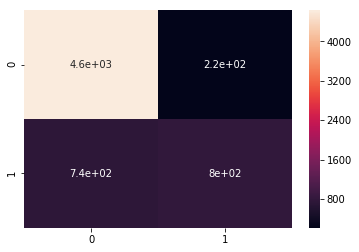

In [45]:
sns.heatmap(confusion_matrix_dtc_hyper, annot=True)

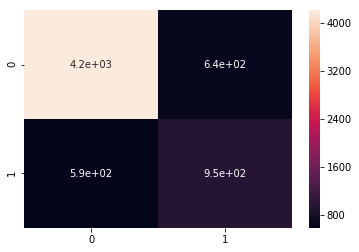

In [46]:
sns.heatmap(confusion_matrix_dtc, annot=True)

In [47]:
labels = np.unique(y_test)
a =  confusion_matrix(y_test, y_test_predict_dtc, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,0,1
0,4207,636
1,587,950


In [48]:
pd.DataFrame(y_test_predict_dtc)[0].value_counts()

0    4794
1    1586
Name: 0, dtype: int64

In [49]:
pd.DataFrame(y_test_predict_dtc_hyper)[0].value_counts()

0    5368
1    1012
Name: 0, dtype: int64

In [50]:
y_train.value_counts()

0    19376
1     6142
Name: income_ordinal, dtype: int64

In [51]:
y.value_counts()

0    24219
1     7679
Name: income_ordinal, dtype: int64

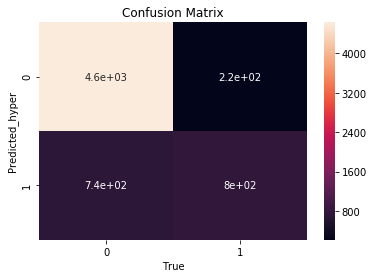

In [52]:
ax= plt.subplot()
sns.heatmap(confusion_matrix_dtc_hyper, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('True');ax.set_ylabel('Predicted_hyper'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);



In [55]:
print("Rf:")
f1_rf = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0), X_train, y_train, scoring='f1', cv = 10)
print(f1_rf)
print("f1 of Random Forest is: " , f1_rf.mean()*100)

print("\n\nLog:")
#print(cross_val_score(log_class, X_train, y_train, scoring='accuracy', cv = 10))
f1_log = cross_val_score(LogisticRegression(solver='liblinear'), X_train, y_train, scoring='f1', cv = 10)
print(f1_log)
print("f1 of LogisticRegression is: " , f1_log.mean()*100)

print("\n\nK Neighbors:")
#print(cross_val_score(knn_class, X_train, y_train, scoring='accuracy', cv = 10))
f1_kn = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train, y_train, scoring='f1', cv = 10)
print(f1_kn)
print("f1 of K Neighbors is: " , f1_kn.mean()*100)
 
print("\n\nDecision Tree:")
#print(cross_val_score(dtc_class, X_train, y_train, scoring='accuracy', cv = 10))
f1_dt = cross_val_score(DecisionTreeClassifier(),X_train, y_train, scoring='f1', cv = 10)
print(f1_dt)
print("f1 of Decision Tree is: " , f1_dt.mean()*100)
 


Rf:
[0.09891808 0.11620795 0.10493827 0.07523511 0.11076923 0.08125
 0.07210031 0.10493827 0.11076923 0.09020218]
f1 of Random Forest is:  9.653286397722342


Log:
[0.37484885 0.37818182 0.41451991 0.35835351 0.40882695 0.36582431
 0.34718826 0.3764988  0.42263279 0.40093787]
f1 of LogisticRegression is:  38.47813065974654


K Neighbors:
[0.4262607  0.41882805 0.42694497 0.39350525 0.42529789 0.41954023
 0.40878701 0.39182916 0.44786945 0.4199815 ]
f1 of K Neighbors is:  41.7884421155361


Decision Tree:
[0.62785208 0.62924901 0.64423077 0.60211554 0.62861736 0.64280032
 0.60032362 0.58600823 0.62608696 0.61423841]
f1 of Decision Tree is:  62.01522310879197
